In [4]:
import sys
import os
import glob
import snapatac2 as snap
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
in_dir = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/snapatac2/filtered/filtered_peaks"

In [24]:
# Get list of all narrrowPeak files
narrowPeak_files = glob.glob(os.path.join(in_dir, "*.narrowPeak"))
narrowPeak_files

['/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/snapatac2/filtered/filtered_peaks/SC.beta.filt.narrowPeak',
 '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/snapatac2/filtered/filtered_peaks/SC.alpha.filt.narrowPeak',
 '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/snapatac2/filtered/filtered_peaks/SC.EC.1.filt.narrowPeak',
 '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/timecourse/A2_control/snapatac2/filtered/filtered_peaks/SC.EC.2.filt.narrowPeak']

In [25]:
# Load them in as dictionary where key is the sample name and values are lists of "chr:start-end" strings
narrowPeak_dict = {}
for file in narrowPeak_files:
    sample = os.path.basename(file).split(".narrowPeak")[0]
    peaks = []
    with open(file, "r") as f:
        for line in f:
            chrom, start, end = line.strip().split("\t")[:3]
            peaks.append(f"{chrom}:{start}-{end}")
    narrowPeak_dict[sample] = peaks
    print(f"Loaded {len(peaks)} peaks for {sample}")

subsample = 0 # Subsample to speed up testing
if subsample > 0:
    for sample in narrowPeak_dict:
        narrowPeak_dict[sample] = np.random.choice(narrowPeak_dict[sample], size=subsample, replace=False)
        print(f"Subsampled {subsample} peaks for {sample}")

Loaded 70249 peaks for SC.beta.filt
Loaded 58431 peaks for SC.alpha.filt
Loaded 46991 peaks for SC.EC.1.filt
Loaded 45332 peaks for SC.EC.2.filt


In [26]:
narrowPeak_dict.keys()

dict_keys(['SC.beta.filt', 'SC.alpha.filt', 'SC.EC.1.filt', 'SC.EC.2.filt'])

In [27]:
motifs = snap.datasets.cis_bp(unique=True)
genome = snap.genome.hg38

In [28]:
motifs = snap.tl.motif_enrichment(
    motifs=snap.datasets.cis_bp(unique=True),
    regions=narrowPeak_dict,
    genome_fasta=snap.genome.hg38,
)

2024-03-22 09:34:08 - INFO - Fetching 220668 sequences ...
2024-03-22 09:35:10 - INFO - Computing enrichment ...
100%|██████████| 1165/1165 [2:12:01<00:00,  6.80s/it] 


In [30]:
motifs

{'SC.beta.filt': shape: (1_165, 6)
 ┌────────────────────────┬────────────┬────────┬───────────────────┬──────────┬──────────────────┐
 │ id                     ┆ name       ┆ family ┆ log2(fold change) ┆ p-value  ┆ adjusted p-value │
 │ ---                    ┆ ---        ┆ ---    ┆ ---               ┆ ---      ┆ ---              │
 │ str                    ┆ str        ┆ f32    ┆ f64               ┆ f64      ┆ f64              │
 ╞════════════════════════╪════════════╪════════╪═══════════════════╪══════════╪══════════════════╡
 │ AC023509.3+M02872_2.00 ┆ AC023509.3 ┆ null   ┆ -0.219312         ┆ 0.000003 ┆ 0.00001          │
 │ AC138696.1+M04597_2.00 ┆ AC138696.1 ┆ null   ┆ -0.017979         ┆ 0.310968 ┆ 0.337945         │
 │ AHR+M09817_2.00        ┆ AHR        ┆ null   ┆ -0.163416         ┆ 0.001364 ┆ 0.002507         │
 │ AIRE+M09375_2.00       ┆ AIRE       ┆ null   ┆ 0.11683           ┆ 0.006165 ┆ 0.010168         │
 │ …                      ┆ …          ┆ …      ┆ …              

In [52]:
motifs["SC.alpha.filt"].to_pandas().sort_values("log2(fold change)", ascending=False).head(50)

,id,name,family,log2(fold change),p-value,adjusted p-value
431,MEF2D+M03343_2.00,MEF2D,NaN,0.246640,0.000000e+00,0.000000e+00
430,MEF2C+M02745_2.00,MEF2C,NaN,0.243215,0.000000e+00,0.000000e+00
399,LCORL+M01304_2.00,LCORL,NaN,0.197336,2.243863e-05,4.149366e-04
230,GATA2+M09550_2.00,GATA2,NaN,0.193471,8.811913e-08,2.933108e-06
398,LCOR+M02433_2.00,LCOR,NaN,0.185888,1.580203e-04,2.217995e-03
534,NR2F6+M03386_2.00,NR2F6,NaN,0.185217,2.275884e-09,1.152785e-07
717,SRF+M03342_2.00,SRF,NaN,0.184234,3.964280e-03,2.359060e-02
622,RARB+M05564_2.00,RARB,NaN,0.182443,1.281595e-08,5.742530e-07
996,ZNF443+M07659_2.00,ZNF443,NaN,0.181284,0.000000e+00,0.000000e+00
1044,ZNF580+M04642_2.00,ZNF580,NaN,0.178470,1.690466e-04,2.316932e-03


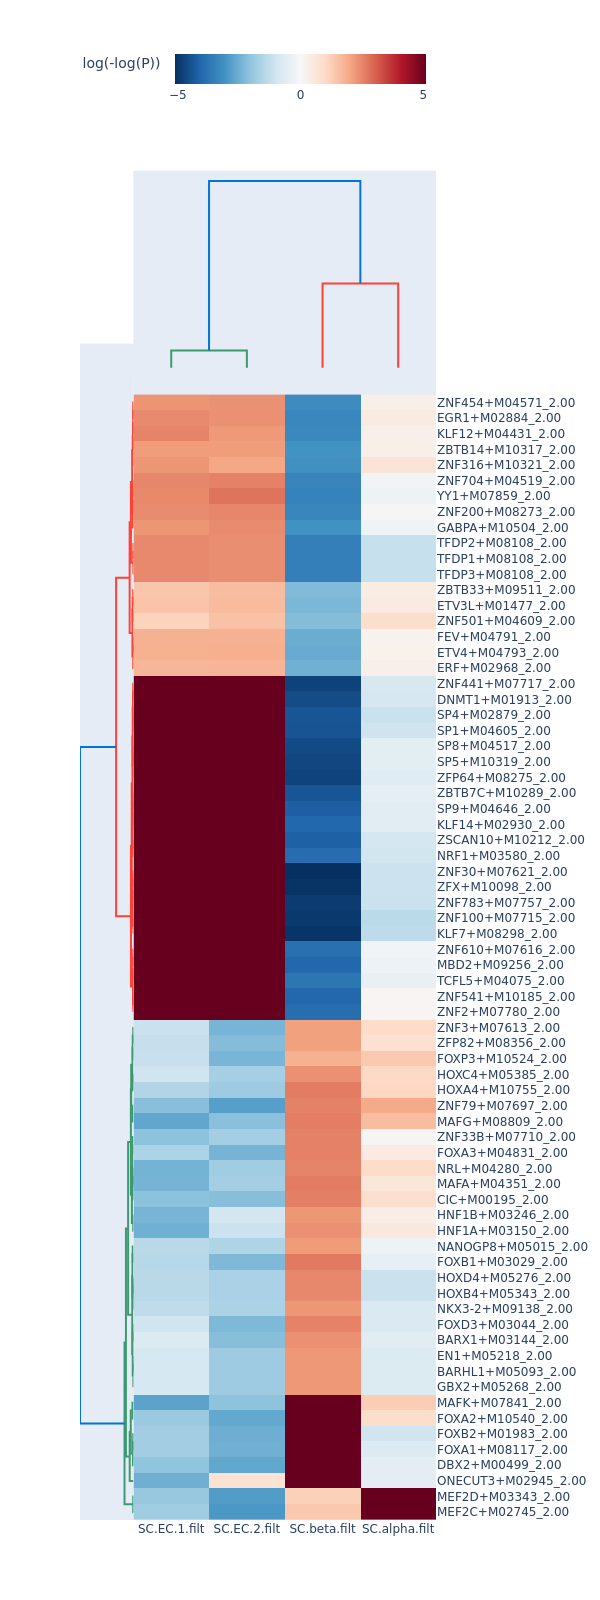

In [54]:
snap.pl.motif_enrichment(motifs, min_log_fc=0.25, max_fdr=1e-8, height=1600, interactive=False)